In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('기상개황_광주지역__20230327110805.csv',encoding='cp949')
data

FileNotFoundError: [Errno 2] No such file or directory: '기상개황_광주지역__20230327110805.csv'

In [777]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 49 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   월별(1)    14 non-null     object
 1   2018     14 non-null     object
 2   2018.1   14 non-null     object
 3   2018.2   14 non-null     object
 4   2018.3   14 non-null     object
 5   2018.4   14 non-null     object
 6   2018.5   14 non-null     object
 7   2018.6   14 non-null     object
 8   2018.7   14 non-null     object
 9   2018.8   14 non-null     object
 10  2018.9   14 non-null     object
 11  2018.10  14 non-null     object
 12  2018.11  14 non-null     object
 13  2018.12  14 non-null     object
 14  2018.13  14 non-null     object
 15  2018.14  14 non-null     object
 16  2018.15  14 non-null     object
 17  2019     14 non-null     object
 18  2019.1   14 non-null     object
 19  2019.2   14 non-null     object
 20  2019.3   14 non-null     object
 21  2019.4   14 non-null     object
 22  2019

In [778]:
hour=data[['2018.11','2019.11','2020.11']]

In [779]:
hour.columns=['1','2','3']

In [780]:
hour=hour.iloc[[1]]

In [781]:
hour.reset_index(drop=True,inplace=True)
hour

,1,2,3
0,2372.5,2290.1,2225.1


In [7]:
data=pd.read_csv('sprint/sprint1/data/한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv',encoding='cp949')
data

FileNotFoundError: [Errno 2] No such file or directory: 'sprint/sprint1/data/한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv'

In [783]:
data.drop(data[data['지역']!='광주시'].index,inplace=True)
data.reset_index(drop=True,inplace=True)

In [784]:
data1=data[data['거래일자'].str.contains('2018')]
data2=data[data['거래일자'].str.contains('2019')]
data3=data[data['거래일자'].str.contains('2020')]

In [785]:
data1.columns=['거래일자','거래시간','지역','발전량']
data2.columns=['거래일자','거래시간','지역','발전량']
data3.columns=['거래일자','거래시간','지역','발전량']

In [786]:
d={'연도':['2018','2019','2020'],'총 태양광발전량':[data1['발전량'].sum(),data2['발전량'].sum(),data3['발전량'].sum()]}
sun=pd.DataFrame(data=d)

In [787]:
sun.astype({'총 태양광발전량':'int'})

,연도,총 태양광발전량
0,2018,49377803
1,2019,61300463
2,2020,69891537


In [788]:
hour=hour.transpose()

In [789]:
hour['연도']=['2018','2019','2020']
hour.columns=('총 일조시간','연도')
hour.reset_index(drop=True,inplace=True)
hour['총 일조시간']=hour['총 일조시간'].astype(float)
hour

,총 일조시간,연도
0,2372.5,2018
1,2290.1,2019
2,2225.1,2020


(2000.0, 2500.0)

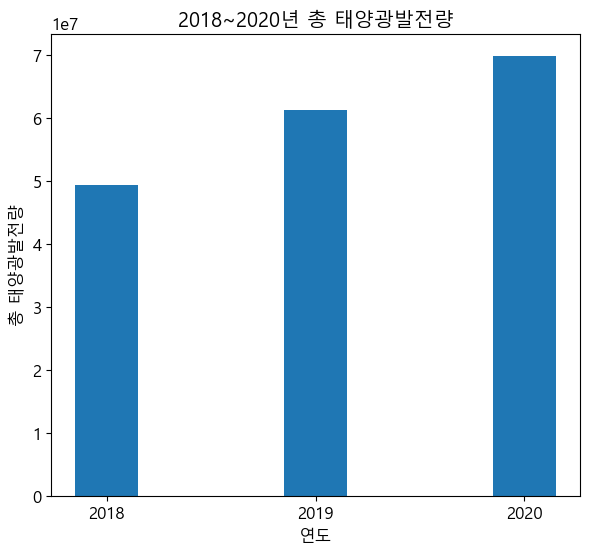

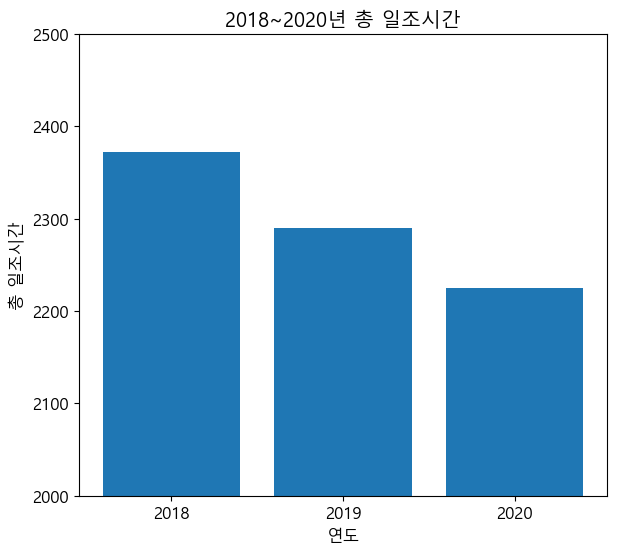

In [790]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar('연도','총 태양광발전량',data=sun,width=0.3)
plt.xlabel('연도')
plt.ylabel('총 태양광발전량')
plt.title('2018~2020년 총 태양광발전량')

plt.figure(figsize=(15,6))
plt.subplot(122)
plt.bar(hour['연도'],hour['총 일조시간'])
plt.xlabel('연도')
plt.ylabel('총 일조시간')
plt.title('2018~2020년 총 일조시간')
plt.ylim(2000,2500)

In [791]:
data=pd.read_csv('월별 시도별 신재생연계ESS 설비용량 자료(2018_2020).csv',encoding='cp949')
data

,연도,월,지역,태양광 전체 설비용량(MW),풍력 전체 설비용량,ESS연계 태양광 설비용량,ESS연계 풍력 설비용량,태양광ESS 설비용량,풍력ESS 설비용량
0,2018,1,경기도,106.8,5.3,2.0,3.0,2.0,0.1
1,2018,1,강원도,152.5,323.3,10.5,48.0,8.9,9.0
2,2018,1,경상남도,164.1,47.8,17.3,14.0,15.4,3.0
3,2018,1,경상북도,256.4,337.0,23.1,90.3,21.2,23.8
4,2018,1,전라남도,619.6,206.2,47.6,75.8,40.6,9.3
...,...,...,...,...,...,...,...,...,...
607,2020,12,광주시,56.6,0.0,6.5,0.0,5.0,0.0
608,2020,12,대구시,38.4,0.0,6.9,0.0,6.0,0.0
609,2020,12,세종시,20.7,0.0,3.5,0.0,3.3,0.0
610,2020,12,울산시,26.4,1.7,4.0,0.0,1.8,0.0


In [792]:
data=data[['연도','월','지역','태양광 전체 설비용량(MW)']]
data

,연도,월,지역,태양광 전체 설비용량(MW)
0,2018,1,경기도,106.8
1,2018,1,강원도,152.5
2,2018,1,경상남도,164.1
3,2018,1,경상북도,256.4
4,2018,1,전라남도,619.6
...,...,...,...,...
607,2020,12,광주시,56.6
608,2020,12,대구시,38.4
609,2020,12,세종시,20.7
610,2020,12,울산시,26.4


In [793]:
data1=data.groupby('지역').get_group('광주시')
data1

,연도,월,지역,태양광 전체 설비용량(MW)
12,2018,1,광주시,32.3
29,2018,2,광주시,33.3
46,2018,3,광주시,35.1
63,2018,4,광주시,35.1
80,2018,5,광주시,36.9
97,2018,6,광주시,40.2
114,2018,7,광주시,40.6
131,2018,8,광주시,41.7
148,2018,9,광주시,41.7
165,2018,10,광주시,41.7


In [794]:
data1.reset_index(drop=True,inplace=True)

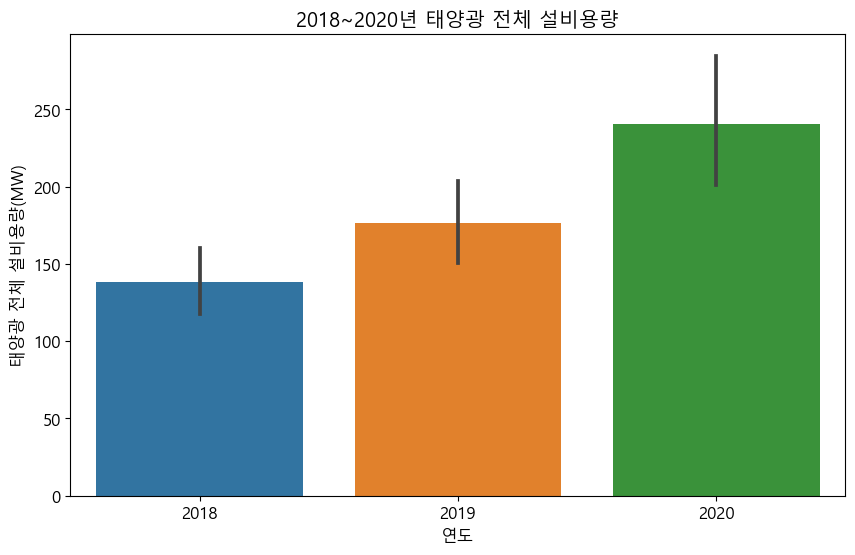

In [795]:
data1=data1.groupby('연도')['태양광 전체 설비용량(MW)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=data,x='연도', y='태양광 전체 설비용량(MW)')
plt.title('2018~2020년 태양광 전체 설비용량')
plt.show()